In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Stock Correlation in Portfolio Mgt


In [3]:
assetList = ['BAC', 'WMT', 'JNPR', 'JNJ', 'CVS', 'BX', 'ABB', 'ORCL', 'USRT', 'T', 'SPY']

price_data = pd.DataFrame()
for asset in assetList:
    data = yf.download(asset, start="2021-01-01", end="2023-04-23")
    data["Symbol"] = asset
    price_data = pd.concat([price_data, data])

price_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
pivot_df = price_data.pivot('Date','Symbol','Close').reset_index()
pivot_df.head()

Symbol,Date,ABB,BAC,BX,CVS,JNJ,JNPR,ORCL,SPY,T,USRT,WMT
0,2021-01-04,28.270000,30.030001,63.000000,69.989998,156.500000,22.610001,63.750000,368.790009,22.235649,46.740002,146.529999
1,2021-01-05,28.920000,30.260000,62.810001,70.459999,158.339996,23.360001,62.959999,371.329987,22.099697,46.689999,145.750000
2,2021-01-06,29.670000,32.150002,61.660000,72.559998,159.830002,23.580000,62.570000,373.549988,22.530210,47.020000,146.660004
3,2021-01-07,30.040001,32.860001,63.230000,73.989998,160.369995,23.830000,63.070000,379.100006,22.590633,46.830002,146.649994
4,2021-01-08,30.260000,32.529999,62.900002,74.860001,160.039993,23.799999,63.380001,381.260010,21.918428,47.230000,146.630005


In [5]:
corr_df = pivot_df.corr(method='pearson')
#reset symbol as index (rather than 0-X)
corr_df.head()

Symbol,ABB,BAC,BX,CVS,JNJ,JNPR,ORCL,SPY,T,USRT,WMT
Symbol,,,,,,,,,,,
ABB,1.000000,0.638665,0.536172,-0.042960,-0.079729,0.377846,0.769675,0.809946,0.202811,0.636036,0.461879
BAC,0.638665,1.000000,0.731284,0.316738,0.058145,0.271173,0.454788,0.835922,0.087544,0.815009,0.231402
BX,0.536172,0.731284,1.000000,0.532243,0.191501,0.540849,0.587577,0.851105,-0.314904,0.864422,0.161976
CVS,-0.042960,0.316738,0.532243,1.000000,0.564655,0.655780,0.085723,0.302316,-0.614433,0.456082,0.006593
JNJ,-0.079729,0.058145,0.191501,0.564655,1.000000,0.342647,-0.071798,0.092735,-0.040239,0.267213,0.137108


<AxesSubplot:xlabel='Symbol', ylabel='Symbol'>

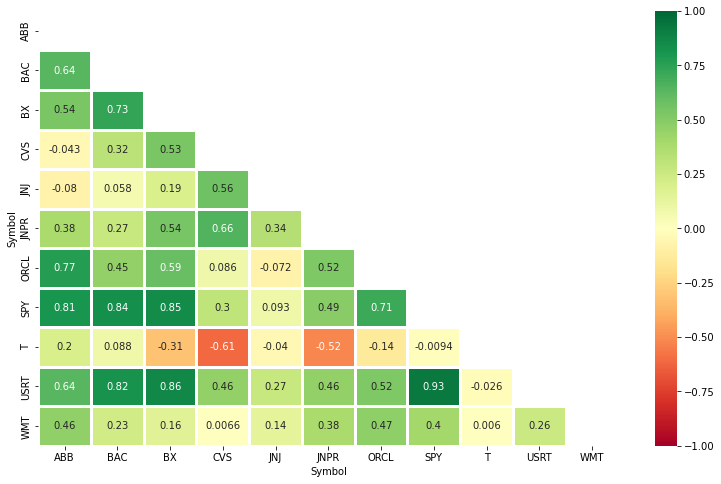

In [6]:
#grab bottom half
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True

#plot correlations
plt.figure(figsize=(13,8))
sns.heatmap(corr_df, annot=True, cmap='RdYlGn', vmax=1.0,vmin=-1.0, mask = mask, linewidths=2.5)

In [7]:
avg_corr = corr_df.mean()
print(avg_corr)

Symbol
ABB     0.482758
BAC     0.494606
BX      0.516566
CVS     0.296613
JNJ     0.223840
JNPR    0.410293
ORCL    0.445956
SPY     0.582180
T      -0.033473
USRT    0.561501
WMT     0.319485
dtype: float64


In [8]:
print(avg_corr.mean())

0.3909386622940486
